# 📊 Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Annisa Rahmapuri
- **Email:** annisa.rahmapuri@gmail.com
- **ID Dicoding:** anrahmapuri

## 🗣 Menentukan Pertanyaan Bisnis

Product and Category Performance
- Kategori produk mana yang menghasilkan pendapatan tertinggi, dan apa tren yang terkait dari waktu ke waktu?
- Berapa waktu rata-rata pengiriman untuk setiap kategori produk, dan bagaimana ini memengaruhi ulasan pelanggan?
- Produk mana yang memiliki tingkat pengembalian atau refund tertinggi, dan apa yang menjadi faktor penyebabnya (misalnya barang rusak, deskripsi produk yang tidak sesuai)?

## 🗂 Import Semua Packages/Library yang Digunakan

In [46]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for handling datetime
from datetime import datetime

## ⚙ Data Wrangling

### ⚒ Gathering Data

In [47]:
customers = pd.read_csv('Brazillian-ecommerce-dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('Brazillian-ecommerce-dataset/olist_geolocation_dataset.csv')
order_items = pd.read_csv('Brazillian-ecommerce-dataset/olist_order_items_dataset.csv')
order_payments = pd.read_csv('Brazillian-ecommerce-dataset/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('Brazillian-ecommerce-dataset/olist_order_reviews_dataset.csv')
orders = pd.read_csv('Brazillian-ecommerce-dataset/olist_orders_dataset.csv')
products = pd.read_csv('Brazillian-ecommerce-dataset/olist_products_dataset.csv')
sellers = pd.read_csv('Brazillian-ecommerce-dataset/olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('Brazillian-ecommerce-dataset/product_category_name_translation.csv')

In [48]:
print("Order Items:")
order_items.head()

Order Items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [49]:
print("Orders:")
orders.head()

Orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [50]:
print("Products:")
products.head()

Products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
print("Order Reviews:")
order_reviews.head()

Order Reviews:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [52]:
print("Product Category Translation:")
product_category_translation.head()

Product Category Translation:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [53]:
# Define a function to display info of each DataFrame
def display_info(df, df_name):
    print(f"\nInfo for {df_name}:\n")
    df.info()
    print("\n")

# Load relevant datasets 
datasets = {
    'Order Items': order_items,
    'Orders': orders,
    'Products': products,
    'Order Reviews': order_reviews,
    'Product Category Translation': product_category_translation
}

# Display info for each dataset
for name, df in datasets.items():
    display_info(df, name)



Info for Order Items:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB



Info for Orders:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    994

**Insight:**

Ukuran Data dan Struktur Kolom:
- Order Items memiliki jumlah baris terbesar dengan 112,650 data transaksi item pesanan.
- Orders berisi 99,441 data pesanan unik, yang memberikan informasi status dan waktu proses pesanan.
- Products mencatat informasi produk, dengan 32,951 produk unik namun dengan beberapa nilai yang hilang terkait atribut deskripsi.
- Order Reviews mengandung 99,224 ulasan pesanan namun hanya sekitar 41% yang memiliki isi ulasan (banyak nilai kosong pada kolom review_comment_message).
- Product Category Translation adalah tabel yang sangat kecil (71 baris) yang menyediakan terjemahan kategori produk.

Ketersediaan Nilai dan Kekonsistenan Data:
- Order Items tidak memiliki nilai kosong dan lengkap dalam informasinya, termasuk order_id, product_id, price, dan biaya pengiriman (freight_value).
- Orders memiliki beberapa kolom waktu yang tidak lengkap:
order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki beberapa nilai kosong, kemungkinan besar karena status pesanan belum selesai atau proses pengiriman yang belum selesai.
- Products memiliki kekurangan data pada atribut produk seperti product_category_name, product_name_lenght, dan atribut lainnya, menunjukkan bahwa beberapa produk mungkin tidak memiliki deskripsi lengkap atau kategori yang jelas.
- Order Reviews memiliki informasi lengkap terkait review_id, order_id, dan review_score. Namun, kolom teks seperti review_comment_title dan review_comment_message memiliki banyak nilai kosong, mengindikasikan bahwa hanya sebagian ulasan yang memiliki komentar teks.
- Product Category Translation lengkap tanpa nilai kosong dan menyediakan terjemahan langsung dari kategori produk dalam bahasa Portugis ke bahasa Inggris.



### 📝 Assessing Data

**Missing Value**
- Identifikasi kolom dengan nilai kosong yang signifikan.
- Evaluasi apakah nilai kosong tersebut perlu diisi (imputasi), dihapus, atau dapat dibiarkan.

In [54]:
# Checking missing values in each relevant DataFrame
print("\nMissing Values in Order Items:")
print(order_items.isnull().sum())

print("\nMissing Values in Orders:")
print(orders.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Order Reviews:")
print(order_reviews.isnull().sum())



Missing Values in Order Items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing Values in Orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing Values in Products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing Values in Order Reviews:
review_id                      0
order_id             

**Insight:**
- Order Items: Tidak ada nilai kosong.
- Orders: Beberapa nilai kosong pada kolom waktu (order_approved_at, order_delivered_carrier_date, order_delivered_customer_date).
- Products: Nilai kosong signifikan pada product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty.
- Order Reviews: Sebagian besar ulasan teks (review_comment_message) memiliki nilai kosong.

**Duplicate Data**

In [55]:
print("\nDuplicates in Order Items:", order_items.duplicated().sum())
print("Duplicates in Orders:", orders.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Order Reviews:", order_reviews.duplicated().sum())
print("Duplicates in Product Category Translation:", product_category_translation.duplicated().sum())


Duplicates in Order Items: 0
Duplicates in Orders: 0
Duplicates in Products: 0
Duplicates in Order Reviews: 0
Duplicates in Product Category Translation: 0


**Insight:**
- Pada masing masing dataframe sudah baik karena tidak memiliki data duplikat.

**Data Type**

In [56]:
# Check the data types of date columns in Orders
print("\nDate Columns in Orders:")
print(orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].dtypes)


Date Columns in Orders:
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


**Insight**
- Tipe data masih berupa object, harus dikonversikan ke tipe datetime untuk memudahkan analisis terkait waktu pengiriman, pembelian, dan penyelesaian pesanan.

**Inconsistent value**

In [57]:
untranslated_categories = products[~products['product_category_name'].isin(product_category_translation['product_category_name'])]
print("\nUntranslated Categories:")
print(untranslated_categories['product_category_name'].unique())



Untranslated Categories:
[nan 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


In [58]:
# Check consistency in order status and dates
inconsistent_orders = orders[(orders['order_status'] == 'delivered') & (orders['order_delivered_customer_date'].isnull())]
print("\nInconsistent Delivered Orders:")
print(inconsistent_orders.shape[0])



Inconsistent Delivered Orders:
8


**Insight** 
- Ternyata terdapat kategori tanpa terjemahan, perlu diperhatikan apakah data tersebut masih dapat digunakan atau perlu diproses ulang.
- Terdapat inkonsistensi pada urutan waktu dan status pengiriman, bisa menjadi bahan pertimbangan untuk diperbaiki atau dihapus. 

**Inaccurate Value**

In [59]:
print("\nProduct Attributes Distribution:")
products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].describe()



Product Attributes Distribution:


,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


**Insight**
- Terdapat inaccurate value pada kolom product_weight_g, yang mana nilai minimalnya di angka 0. Nilai 0 atau NaN yang tidak sesuai untuk atribut produk seperti berat dan dimensi.

**Distribution & Outlier Data**

In [60]:
print("\nReview Score Distribution:")
order_reviews['review_score'].value_counts()


Review Score Distribution:


review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [61]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())
order_reviews.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight**
- Review score lebih condong banyak memiliki nilai 5. 
- Distribusi yang tidak merata bisa menjadi indikator masalah dalam data atau layanan pelanggan yang tidak seimbang.

### Cleaning Data

**Handling Missing Value**

1. Tabel Order
    - Kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date memiliki beberapa nilai kosong.
    - Karena kolom-kolom ini penting untuk analisis waktu, kita perlu mempertimbangkan penanganannya:
        - Menghapus pesanan yang order_status-nya sudah final (misalnya "delivered") tetapi tidak memiliki order_delivered_customer_date, yang mana hal tersebut merupakah suatu kejanggalan dan termasuk inkonsisten data.
        - Hapus baris dengan order_status yang mengindikasikan pesanan sudah selesai (delivered, shipped) tetapi tidak memiliki order_approved_at. Ini menunjukkan inkonsistensi dalam data. 
        - Jika order_status adalah "canceled," maka nilai kosong pada waktu pengiriman dapat dibiarkan karena pesanan tidak pernah dikirim.
        - Jika order_status menunjukkan pengiriman (shipped, delivered) tetapi order_delivered_carrier_date kosong, baris ini perlu diperiksa lebih lanjut atau dihapus.
        - Jika order_status adalah delivered tetapi tidak memiliki order_delivered_customer_date, baris ini kemungkinan besar tidak konsisten dan perlu dihapus.


In [62]:
unique_order_status = orders['order_status'].unique()
unique_order_status

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Terdapat 8 nilai unik yang ada di kolom order_status, berikut adlaah analasisi status satu persatu untuk melihat potensi missing vallue. 

In [63]:
# Mengambil baris dengan status 
created = orders[orders['order_status'] == 'created']

# Menampilkan baris-baris dengan status 
created.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,5,5,5,5,0,0,0,5
unique,5,5,1,5,0,0,0,5
top,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
freq,1,1,5,1,NaN,NaN,NaN,1


**Insight**

created : Pesanan baru dibuat, semua kolom tanggal kosong dan tidak terlihat missing value

In [64]:
# Mengambil baris dengan status 
approved = orders[orders['order_status'] == 'approved']

# Menampilkan baris-baris dengan status 
approved.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,2,2,2,2,2,0,0,2
unique,2,2,1,2,2,0,0,2
top,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,NaN,2017-03-01 00:00:00
freq,1,1,2,1,1,NaN,NaN,1


**Insight**

approved : 2 Pesanan disetujui, order_approved_at terisi, lainnya kosong dan tidak terlihat missing vallue.

In [65]:
# Mengambil baris dengan status 
invoiced = orders[orders['order_status'] == 'invoiced']

# Menampilkan baris-baris dengan status 
invoiced.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,314,314,314,314,314,0,0,314
unique,314,314,1,314,314,0,0,196
top,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2018-06-07 00:00:00
freq,1,1,314,1,1,NaN,NaN,5


**Insight**

invoiced : 314 Pesanan sudah ditagihkan, order_approved_at terisi, lainnya kosong dan tidak terlihat missing vallue.

In [66]:
# Mengambil baris dengan status 
processing = orders[orders['order_status'] == 'processing']

# Menampilkan baris-baris dengan status 
processing.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,301,301,301,301,301,0,0,301
unique,301,301,1,301,301,0,0,182
top,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2018-02-05 00:00:00
freq,1,1,301,1,1,NaN,NaN,6


**Insight**

processing : 301 Pesanan sudah diproses, order_approved_at terisi, lainnya kosong dan tidak terlihat missing vallue.

In [67]:
# Mengambil baris dengan status 
shipped = orders[orders['order_status'] == 'shipped']

# Menampilkan baris-baris dengan status 
shipped.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,1107,1107,1107,1107,1107,1107,0,1107
unique,1107,1107,1,1106,1104,1104,0,344
top,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2017-01-08 19:27:22,2017-01-08 19:45:02,2018-05-15 12:37:00,NaN,2018-04-12 00:00:00
freq,1,1,1107,2,2,2,NaN,12


**Insight**

shipped : 1107 Pesanan dikirim oleh carrier,  order_approved_at dan order_delivered_carrier_date terisi, order_delivered_customer_date kosong. 

In [68]:
# Mengambil baris dengan status 
delivered = orders[orders['order_status'] == 'delivered']

# Menampilkan baris-baris dengan status 
delivered.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96478,96478,96478,96478,96464,96476,96470,96478
unique,96478,96478,1,95956,88274,80106,95658,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,507


**Insight**

Deskripsi data tersebut menunjukkan bahwa ada missing values di beberapa kolom:
- order_approved_at: 14 nilai kosong.
- order_delivered_carrier_date: 2 nilai kosong.
- order_delivered_customer_date: 8 nilai kosong.

Ini berarti ada beberapa pesanan yang tidak memiliki informasi persetujuan, pengiriman carrier, atau penerimaan pelanggan meskipun statusnya 'delivered'.

In [69]:
# Menampilkan baris dengan status 'delivered' dan memiliki missing values di kolom tertentu
missing_values = orders[(orders['order_status'] == 'delivered') & (orders[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1))]
missing_values

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00


In [70]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Total baris di tabel orders adalah 112.650 dan jumlah missing values di kolom-kolom tersebut relatif kecil (14, 2, dan 8 nilai kosong), maka secara proporsi mereka tidak signifikan (kurang dari 0,1% dari total data) sehinggan saya memutuskan untuk drop baris yang memiliki missing values tersebut.

In [71]:
# Menghapus baris dengan nilai yang hilang di kolom yang spesifik
orders_cleaned = orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])
orders_cleaned

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [72]:
# Mengambil baris dengan status 
unavailable = orders[orders['order_status'] == 'unavailable']

# Menampilkan baris-baris dengan status 
unavailable.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,609,609,609,609,609,0,0,609
unique,609,609,1,607,607,0,0,263
top,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-03 22:26:44,2018-07-28 23:31:01,NaN,NaN,2017-11-30 00:00:00
freq,1,1,609,2,2,NaN,NaN,8


**Insight**

Unavailabe : 609 Pesanan tidak tersedia,  order_approved_at terisi, yang lainya kosong kosong. 

In [73]:
# Mengambil baris dengan status 
canceled = orders[orders['order_status'] == 'canceled']

# Menampilkan baris-baris dengan status 
canceled.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,625,625,625,625,484,75,6,625
unique,625,625,1,625,483,74,6,289
top,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-03-15 10:29:39,2018-01-26 20:12:58,2018-03-21 22:03:51,2018-03-12 00:00:00
freq,1,1,625,1,2,2,1,9


**Insight**

Berdasarkan deksripsi data tersebut menunjukkan bahwa terdapat missing values pada beberapa kolom dengan status canceled:
- order_approved_at: 141 nilai kosong (tidak disetujui).
- order_delivered_carrier_date: 550 nilai kosong (tidak dikirim).
- order_delivered_customer_date: 619 nilai kosong (tidak diterima).

Ini wajar, karena pesanan dibatalkan sebelum mencapai tahapan tersebut.

In [74]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Untuk semua status yang memang memiliki nilai NaN karena tahapan tersebut belum tercapai atau tidak berlaku, dapat menggunakan pendekatan yang sama, mengisi nilai NaN dengan sesuatu yang lebih relevan seperti "Not Applicable" atau NaT.

In [75]:
# Mengisi missing value di semua kolom yang relevan dengan "Not Applicable" untuk setiap status yang masih ada NaN
cols_to_fill = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
orders_cleaned[cols_to_fill] = orders[cols_to_fill].fillna(pd.NaT)

orders_cleaned.isnull().sum()


C:\Users\annis\AppData\Local\Temp\ipykernel_19216\2048272502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_cleaned[cols_to_fill] = orders[cols_to_fill].fillna(pd.NaT)


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

2. Tabel Products
    - product_category_name dan beberapa atribut produk (product_name_lenght, product_description_lenght) memiliki nilai kosong.
    - Menghapus produk yang product_category_name-nya kosong karena informasi kategori penting untuk analisis.
    - Jika hanya terdapat sedikit nilai kosong (seperti dalam kasus ini hanya 610 baris dari 32950 baris), opsi termudah adalah menghapus baris tersebut.

In [76]:
# Menampilkan baris yang memiliki missing value pada kolom 'product_category_name'
missing_product_category = products[products['product_category_name'].isna()]
missing_product_category

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [77]:
# Remove rows where product_category_name is missing
products_cleaned = products.dropna(subset=['product_category_name'])

# Verify if missing values in products are handled
print("\nRemaining Missing Values in Products:")
print(products_cleaned.isnull().sum())



Remaining Missing Values in Products:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64


3. Tabel Order Review
    - review_comment_tittle dan review_comment_massage banyak memiliki nilai kosong.
    -  Karena sebagian besar data hilang, saya memutuskan untuk mengganti nilai NaN dengan "No Title" atau nilai lain yang menunjukkan ketiadaan komentar. Ini lebih relevan untuk mempertahankan kolom tersebut.

In [78]:
# Mengisi missing value di kolom 'review_comment_title' dengan "No Title"
order_reviews_cleaned = order_reviews.copy()  # Membuat salinan dataset asli
order_reviews_cleaned['review_comment_title'] = order_reviews_cleaned['review_comment_title'].fillna('No Title')
order_reviews_cleaned['review_comment_message'] = order_reviews_cleaned['review_comment_message'].fillna('No Comment')

order_reviews_cleaned


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Title,No Comment,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Title,No Comment,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No Title,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No Title,No Comment,2018-07-01 00:00:00,2018-07-02 12:59:13


**Handling Data Type**

Mengonversi Kolom Waktu ke datetime
- Pada tabel orders, semua kolom yang terkait waktu (order_purchase_timestamp, order_approved_at, dll.) harus diubah ke tipe datetime.

In [79]:
# Convert date columns to datetime format in orders
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date']

for col in date_columns:
    orders_cleaned[col] = pd.to_datetime(orders_cleaned[col])

# Verify the data type conversion
print("\nData Types after Conversion:")
print(orders_cleaned[date_columns].dtypes)

C:\Users\annis\AppData\Local\Temp\ipykernel_19216\2121565895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_cleaned[col] = pd.to_datetime(orders_cleaned[col])



Data Types after Conversion:
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


C:\Users\annis\AppData\Local\Temp\ipykernel_19216\2121565895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_cleaned[col] = pd.to_datetime(orders_cleaned[col])
C:\Users\annis\AppData\Local\Temp\ipykernel_19216\2121565895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_cleaned[col] = pd.to_datetime(orders_cleaned[col])
C:\Users\annis\AppData\Local\Temp\ipykernel_19216\2121565895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

**Handling Inconsistent Data**

Penanganan Nilai Terjemaan yang Tidak Konsisten pada product_category_name

Memastikan bahwa semua kategori produk memiliki terjemahan yang benar dengan tabel product_category_translation.

In [80]:
products_cleaned.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [81]:
# Merge product categories with their English translations
products_translated = pd.merge(products_cleaned, product_category_translation, on='product_category_name', how='left')

# Verify if all categories have an English translation
missing_translation = products_translated[products_translated['product_category_name_english'].isnull()]
print("\nCategories without English translation:")
print(missing_translation['product_category_name'].unique())


Categories without English translation:
['pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


Terdapat 2 kategori yang belum diterjemahkan dan saya memutuskan untuk meganggti dengan terjemahannya secara mandiri

In [82]:
# Create a DataFrame with the missing translations
missing_translation_df = pd.DataFrame({
    'product_category_name': ['pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
    'product_category_name_english': ['pc_gamer', 'kitchen_utensils_and_food_processors']
})

# Concatenate the missing translations to the original translation table
product_category_translation = pd.concat([product_category_translation, missing_translation_df], ignore_index=True)

# Display the updated translation table in the correct format
print("\nUpdated Product Category Translation:")
product_category_translation


Updated Product Category Translation:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer


In [83]:
product_category_translation.to_csv('Cleaned/product_category_translation.csv', index=False) 


Gabungkan (merge) products_cleaned dengan product_category_translation untuk mendapatkan kolom terjemahan bahasa Inggris (product_category_name_english).

In [84]:
# Merge products_cleaned with product_category_translation to add English category names
products_cleaned = pd.merge(products_cleaned, product_category_translation, on='product_category_name', how='left')

# Verify the merge result
print("\nUpdated products_cleaned with English category names:")
products_cleaned.head()



Updated products_cleaned with English category names:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [85]:
products_cleaned.isnull().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

Dengan melakukan langkah ini, semua kategori produk akan memiliki terjemahan bahasa Inggris yang sesuai, sehingga tabel products dapat dianalisis dengan lebih mudah menggunakan terjemahan.

**Handling Outliers**

Atribut Produk pada products

Memeriksa distribusi nilai pada atribut produk (product_weight_g, product_length_cm, dll.) untuk menemukan outliers atau nilai yang tidak realistis (misalnya 0 atau NaN).

In [86]:
# Replace zeros in product attributes with NaN for easier handling of invalid values
products_cleaned[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = products_cleaned[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].replace(0, np.nan)

# Drop rows with NaN in important product attributes
products_cleaned = products_cleaned.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

print("\nRemaining Missing Values after handling product attributes:")
print(products_cleaned.isnull().sum())



Remaining Missing Values after handling product attributes:
product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64


In [87]:
# Checking missing values in each relevant DataFrame
print("\nMissing Values in Order Items:")
print(order_items.isnull().sum())

print("\nMissing Values in Orders:")
print(orders_cleaned.isnull().sum())

print("\nMissing Values in Products:")
print(products_cleaned.isnull().sum())

print("\nMissing Values in Order Reviews:")
print(order_reviews_cleaned.isnull().sum())



Missing Values in Order Items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing Values in Orders:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Missing Values in Products:
product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

Missing Values in Order Reviews:
review_id                  0
order

Sampai di tahap ini saya sudah memiliki dataset bersih sebagai berikut : 
- Order Items (order_items)
- Orders (orders_cleaned)
- Products (products_cleaned)
- Order Reviews (order_reviews_cleaned)

## 🔎 Exploratory Data Analysis (EDA)

### Explorasi Hasil Pendapatan

Menggabungkan data terkait pendapatan per kategori produk

Pendapatan berasal dari kolom price di order_items. Untuk menganalisis kategori produk, perlu menggabungkan tabel order_items dengan tabel products (untuk kategori produk) dan product_category_translation (untuk terjemahan kategori).

In [43]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [44]:
products_cleaned

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32336,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32337,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32338,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32339,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [128]:
order_items_products = order_items.merge(products_cleaned, on='product_id')
order_items_products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111033,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
111034,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
111035,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
111036,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


Setelah menggabungkan data, saya menghitung total pendapatan (price) per kategori produk.

In [129]:
# Menghitung total pendapatan per kategori produk
revenue_per_category = order_items_products.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False)

revenue_per_category.head(10)

product_category_name_english
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036039.18
sports_leisure            988048.97
computers_accessories     911954.32
furniture_decor           729762.49
cool_stuff                635290.85
housewares                632248.66
auto                      592720.11
garden_tools              485256.46
Name: price, dtype: float64

**Insight** 

- Dari hasil data, dapat dilihat bahwa kategori *Health & Beauty* mendominasi penjualan dengan pendapatan tertinggi dengan total pendapatan senilai $1,258,681.34. 

Menggabungkan data dengan informasi waktu untuk melihat tren

Untuk melihat tren pendapatan dari waktu ke waktu, saya menggabungkan data order_items_products dengan tabel orders, yang memiliki informasi terkait waktu pembelian (order_purchase_timestamp).

In [130]:
# Gabungkan order_items_products dengan tabel orders untuk mendapatkan informasi waktu
order_items_products_time = order_items_products.merge(orders_cleaned[['order_id', 'order_purchase_timestamp']], on='order_id')

# Konversi kolom order_purchase_timestamp ke format datetime jika belum dilakukan
order_items_products_time['order_purchase_timestamp'] = pd.to_datetime(order_items_products_time['order_purchase_timestamp'])

# Buat kolom baru untuk bulan dan tahun
order_items_products_time['purchase_month'] = order_items_products_time['order_purchase_timestamp'].dt.to_period('M')

order_items_products_time.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_timestamp,purchase_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017-09-13 08:59:02,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,2017-04-26 10:53:06,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,2018-01-14 14:33:31,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,2018-08-08 10:00:35,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,2017-02-04 13:57:51,2017-02


Setelah data sudah merged, hitung pendapatan bulanan untuk setiap kategori produk untuk melihat tren.

In [131]:
# Menghitung pendapatan per bulan per kategori
revenue_trend = order_items_products_time.groupby(['purchase_month', 'product_category_name_english'])['price'].sum().unstack().fillna(0)

revenue_trend.head()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
purchase_month,,,,,,,,,,,,,,,,,,,,,
2016-09,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00
2016-10,0.00,1349.29,0.0,0.0,156.99,1128.26,1371.17,478.99,0.00,0.0,...,0.00,0.0,0.00,0.0,2033.65,0.00,0.0,228.29,4206.49,2711.07
2016-12,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00
2017-01,65.97,663.70,0.0,0.0,0.00,4820.03,4283.88,3804.36,234.89,0.0,...,183.29,0.0,1660.79,0.0,9172.15,1561.99,0.0,755.94,4568.19,8086.52
2017-02,224.84,2405.30,0.0,0.0,163.80,12358.78,2837.58,15438.14,772.71,0.0,...,0.00,0.0,6941.68,0.0,15600.99,2341.40,792.0,6595.34,9353.44,10992.39


In [132]:
# Memilih kategori produk teratas
top_categories = revenue_per_category.head(5).index
top_categories

Index(['health_beauty', 'watches_gifts', 'bed_bath_table', 'sports_leisure',
       'computers_accessories'],
      dtype='object', name='product_category_name_english')

**Insight**

Berdasarkan hasil dari 5 kategori produk teratas yang menghasilkan pendapatan tertinggi, berikut adalah kategori-kategori yang mendominasi penjualan:
1. Health & Beauty
2. Watches & Gifts
3. Bed, Bath & Table
4. Sports & Leisure
5. Computers & Accessories

### Explorasi Waktu Pengiriman dan Dampak pada Review Pelanggan

Menghitung waktu pengiriman untuk setiap pesanan

Untuk menghitung waktu pengiriman, saya menghitung dari hasil selisih hari antara tanggal pembelian (order_purchase_timestamp) dan tanggal pengiriman ke pelanggan (order_delivered_customer_date).

In [133]:
# Menghitung waktu pengiriman dalam hari
orders_cleaned['shipping_time'] = (orders_cleaned['order_delivered_customer_date'] - orders_cleaned['order_purchase_timestamp']).dt.days

# Periksa distribusi waktu pengiriman untuk melihat apakah ada anomali
orders_cleaned['shipping_time'].describe()


C:\Users\annis\AppData\Local\Temp\ipykernel_7144\3045298278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_cleaned['shipping_time'] = (orders_cleaned['order_delivered_customer_date'] - orders_cleaned['order_purchase_timestamp']).dt.days


count    96461.000000
mean        12.093582
std          9.551576
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: shipping_time, dtype: float64

**Insight**

- Waktu pengiriman rata-rata selama 12 hari. 
- Sebagian besar pesanan (50% hingga 75%) dikirim dalam waktu 6 hingga 15 hari, yang bisa dianggap sebagai kisaran waktu pengiriman normal. Ini menunjukkan bahwa mayoritas pengiriman berada dalam jangka waktu yang masuk akal meskipun ada outlier di kedua sisi.

In [134]:
# Tentukan batas bawah dan batas atas untuk waktu pengiriman yang dianggap wajar
batas_bawah = 1  # Misal, pengiriman yang terjadi dalam 0 hari dianggap anomali
batas_atas = 15  # Pengiriman yang lebih dari 15 hari dianggap anomali

# Cek data dengan waktu pengiriman anomali
anomali_bawah = orders_cleaned[orders_cleaned['shipping_time'] < batas_bawah]
anomali_atas = orders_cleaned[orders_cleaned['shipping_time'] > batas_atas]


# Menampilkan hasil anomali pengiriman dengan waktu terlalu lama dan sorting berdasarkan shipping_time tertinggi
print("\nAnomali pengiriman dengan waktu terlalu lama (diurutkan berdasarkan shipping_time tertinggi):")
anomali_atas_sorted = anomali_atas.sort_values(by='shipping_time', ascending=False)
anomali_atas_sorted


Anomali pengiriman dengan waktu terlalu lama (diurutkan berdasarkan shipping_time tertinggi):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,209
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,195
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,194
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,194
...,...,...,...,...,...,...,...,...,...
45738,0812b411edea2fcc36b4bc1f8e4e36aa,de8d5f6d930d3af55696a28ec701cb9d,delivered,2018-01-13 13:18:10,2018-01-13 13:29:28,2018-01-15 22:04:10,2018-01-29 20:32:27,2018-02-08,16
45714,668691a590a0b7cd73f3b6587fb783da,7f6b61053ca82a4046d6674e78caad62,delivered,2018-02-28 14:24:36,2018-03-01 02:49:00,2018-03-03 00:19:06,2018-03-17 14:13:16,2018-03-22,16
45698,6d0e0305d6f6df15685493270ac1d986,94dad91b40a7449b2f3a4df8f1d4554e,delivered,2018-06-06 11:27:30,2018-06-06 11:35:25,2018-06-11 13:03:00,2018-06-22 12:08:41,2018-07-24,16
88481,a5a5537520c39fc7d242138689e1f77e,b10719011181e9c3e2833f87982abf6d,delivered,2018-08-05 20:01:32,2018-08-07 04:05:12,2018-08-07 15:59:00,2018-08-22 00:08:41,2018-08-24,16


**Insight:**
- Terdapat 23.206 pesanan yang memiliki waktu pengiriman lebih dari 15 hari. 

Setelah menghitung waktu pengiriman, saya akan menggabungkan data dari order_items_products dengan data orders untuk mendapatkan informasi waktu pengiriman berdasarkan kategori produk.

In [135]:
# Gabungkan data order_items_products dengan informasi waktu pengiriman dari tabel orders
shipping_data = order_items_products.merge(orders_cleaned[['order_id', 'shipping_time']], on='order_id')
shipping_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,shipping_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,7
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,16
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,7
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,6
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108630,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,17
108631,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,9
108632,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,4
108633,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,1


Selanjutnya, hitung waktu pengiriman rata-rata untuk setiap kategori produk.

In [136]:
# Menghitung waktu pengiriman rata-rata per kategori produk
avg_shipping_time_per_category = shipping_data.groupby('product_category_name_english')['shipping_time'].mean().sort_values()

# Tampilkan hasilnya
avg_shipping_time_per_category.head(10) # Melihat 10 kategori produk dengan waktu pengiriman rata-rata terendah

product_category_name_english
arts_and_craftmanship                    5.291667
la_cuisine                               7.071429
books_imported                           7.666667
kitchen_utensils_and_food_processors     7.785714
fashion_childrens_clothes                8.142857
pc_gamer                                 8.750000
party_supplies                           8.904762
food                                     9.100200
construction_tools_lights                9.245847
small_appliances_home_oven_and_coffee    9.397260
Name: shipping_time, dtype: float64

In [137]:
avg_shipping_time_per_category.tail(10) # Melihat 10 kategori produk dengan waktu pengiriman rata-rata tertinggi

product_category_name_english
garden_tools                         13.232013
fashion_underwear_beach              13.275591
furniture_living_room                13.294949
home_appliances_2                    13.424242
furniture_mattress_and_upholstery    13.891892
home_comfort_2                       14.066667
fashion_shoes                        14.933852
security_and_services                15.000000
christmas_supplies                   15.300000
office_furniture                     20.386691
Name: shipping_time, dtype: float64

Untuk mengetahui bagaimana waktu pengiriman mempengaruhi ulasan pelanggan, saya mencoba menggabungkan data orders dengan tabel order_reviews untuk mendapatkan skor ulasan.

In [138]:
# Gabungkan data pengiriman dengan tabel order_reviews untuk mendapatkan review_score
shipping_review_data = shipping_data.merge(order_reviews_cleaned[['order_id', 'review_score']], on='order_id')

# Periksa beberapa baris pertama dari data gabungan untuk memastikan semuanya sesuai
shipping_review_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,shipping_time,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,7,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,16,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,7,5
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,6,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,25,5


Selanjutnya, coba untuk menganalisis apakah waktu pengiriman berdampak pada ulasan pelanggan dengan menghitung rata-rata review_score berdasarkan shipping_time.

In [139]:
# Menghitung skor ulasan rata-rata berdasarkan waktu pengiriman
shipping_review_relation = shipping_review_data.groupby('shipping_time')['review_score'].mean()

# Tampilkan hasil awal
shipping_review_relation.head(35)


shipping_time
0     3.333333
1     4.430548
2     4.407346
3     4.379881
4     4.344740
5     4.299314
6     4.305566
7     4.298888
8     4.261867
9     4.210099
10    4.205640
11    4.187522
12    4.200114
13    4.164727
14    4.124536
15    4.123951
16    4.052147
17    4.032234
18    3.974907
19    4.016051
20    3.971264
21    3.880739
22    3.731278
23    3.672634
24    3.551060
25    3.413984
26    3.434501
27    3.313643
28    3.040625
29    3.029470
30    2.950644
31    2.729870
32    2.560109
33    2.579251
34    2.496732
Name: review_score, dtype: float64

**Insight**

- Skor ulasan mulai menunjukkan penurunan yang jelas setelah 5-7 hari pengiriman, meskipun ulasan masih berada di atas 4,0 hingga sekitar 15 hari.
- Setelah 15 hari, kepuasan pelanggan mulai menurun lebih tajam, dengan skor rata-rata turun di bawah 4,0, menunjukkan potensi ketidakpuasan pelanggan terhadap pengiriman yang lambat.
- Waktu pengiriman sekitar 7 hari tampaknya merupakan titik di mana ulasan mulai menunjukkan tren penurunan yang lebih konsisten. 
- Setelah waktu pengiriman mencapai lebih dari 15 hari, skor ulasan rata-rata turun lebih cepat, yang mengindikasikan bahwa pengiriman yang sangat lambat (>15 hari) secara signifikan memengaruhi pengalaman pelanggan.

### Explorasi Tingkat Pengembalian Produk 

Untuk menjawab pertanyaan kedua, saya fokus pada pesanan yang berstatus canceled di tabel orders.

In [140]:
# Filter pesanan yang berstatus canceled
refund_orders = orders_cleaned[orders_cleaned['order_status'] == 'canceled']

Setelah mendapatkan pesanan yang dibatalkan, gabungkan data ini dengan tabel order_items_products untuk melihat kategori produk mana yang sering dibatalkan.

In [141]:
# Gabungkan data refund_orders dengan order_items_products untuk mendapatkan kategori produk
refund_data = refund_orders.merge(order_items_products, on='order_id')

# Periksa data refund dan kategori produk
refund_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time,order_item_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,30,1,...,14.10,beleza_saude,28.0,792.0,1.0,440.0,20.0,11.0,17.0,health_beauty
1,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,7,1,...,0.48,perfumaria,36.0,605.0,2.0,100.0,20.0,20.0,20.0,perfumery
2,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,7,2,...,29.94,beleza_saude,23.0,565.0,1.0,1029.0,20.0,15.0,17.0,health_beauty
3,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,7,1,...,14.03,perfumaria,43.0,259.0,1.0,610.0,22.0,14.0,16.0,perfumery
4,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,10,1,...,11.23,brinquedos,55.0,546.0,1.0,2100.0,22.0,50.0,32.0,toys
5,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,35,1,...,14.11,esporte_lazer,25.0,823.0,1.0,476.0,17.0,14.0,14.0,sports_leisure
6,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,30,1,...,18.51,fashion_bolsas_e_acessorios,60.0,1118.0,6.0,2250.0,22.0,15.0,20.0,fashion_bags_accessories


Selanjutnya, hitung jumlah pengembalian (pesanan yang dibatalkan) untuk setiap kategori produk.

In [142]:
# Menghitung jumlah pengembalian per kategori produk
refund_per_category = refund_data.groupby('product_category_name_english').size().sort_values(ascending=False)

# Tampilkan hasilnya
refund_per_category

product_category_name_english
health_beauty               2
perfumery                   2
fashion_bags_accessories    1
sports_leisure              1
toys                        1
dtype: int64

Salah satu cara untuk melihat faktor penyebab pengembalian adalah dengan mengecek apakah produk yang sering dikembalikan memiliki ulasan yang buruk. Saya mencoba menggabungkan data pengembalian dengan ulasan pelanggan untuk mengetahui keterkaitannya. 

In [143]:
# Gabungkan data refund dengan ulasan pelanggan
refund_reviews = refund_data.merge(order_reviews_cleaned[['order_id', 'review_score']], on='order_id')

# Periksa beberapa baris pertama untuk memastikan data sesuai
refund_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_time,order_item_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score
0,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,30,1,...,beleza_saude,28.0,792.0,1.0,440.0,20.0,11.0,17.0,health_beauty,3
1,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,7,1,...,perfumaria,36.0,605.0,2.0,100.0,20.0,20.0,20.0,perfumery,5
2,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,7,2,...,beleza_saude,23.0,565.0,1.0,1029.0,20.0,15.0,17.0,health_beauty,5
3,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,7,1,...,perfumaria,43.0,259.0,1.0,610.0,22.0,14.0,16.0,perfumery,1
4,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,10,1,...,brinquedos,55.0,546.0,1.0,2100.0,22.0,50.0,32.0,toys,1


Dapat diliat apakah ada hubungan antara pengembalian dan skor ulasan dengan menganalisis distribusi review_score dari produk yang dikembalikan.

In [145]:
# Melihat distribusi skor ulasan dari produk yang dikembalikan
refund_review_distribution = refund_reviews['review_score'].value_counts().sort_index()

# Tampilkan hasil awal
refund_review_distribution

review_score
1    4
3    1
5    2
Name: count, dtype: int64

**Insight**

- Produk yang memiliki skor ulasan 1 mendominasi ulasan produk yang dikembalikan (4 dari 7 ulasan). Ini menunjukkan bahwa produk dengan ulasan yang sangat buruk cenderung lebih sering dikembalikan.
- Ada 2 produk yang menerima skor ulasan 5 (ulasan tertinggi) namun tetap dikembalikan.

## 📊 Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang menghasilkan pendapatan tertinggi, dan apa tren yang terkait dari waktu ke waktu?

#### Visualisasi pendapatan tertinggi per kategori produk

Untuk menunjukkan kategori produk mana yang menghasilkan pendapatan tertinggi, grafik bar chart sangat sesuai. Kita bisa menampilkan pendapatan untuk 10 kategori teratas.

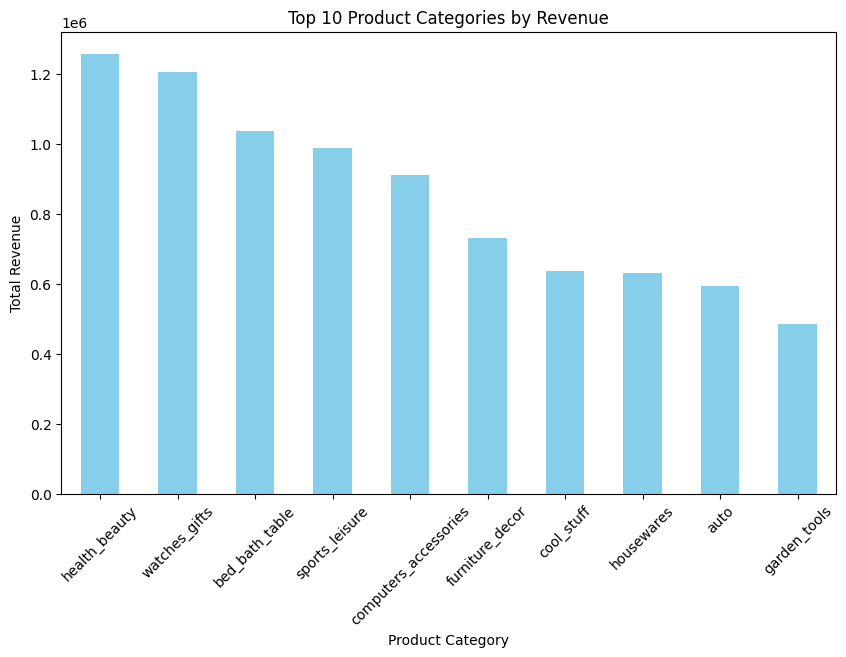

In [146]:
# Visualisasi pendapatan per kategori produk
plt.figure(figsize=(10, 6))
revenue_per_category.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

##### 🌟 Conclution 1.1

- Health & Beauty jelas merupakan kategori dengan performa terbaik, diikuti oleh Watches & Gifts dan Bed, Bath, Table. Investasi dalam kategori ini bisa mendatangkan pendapatan yang lebih tinggi. Selain itu, ada potensi besar untuk mengoptimalkan kategori teknologi dan olahraga, sementara kategori auto dan garden_tools memerlukan perhatian lebih untuk meningkatkan penjualan.


#### Visualisasi tren pendapatan dari waktu ke waktu untuk kategori produk teratas

Untuk melihat tren pendapatan dari waktu ke waktu, bisa menggunakan line chart untuk memvisualisasikan perubahan pendapatan bulanan pada kategori produk teratas.

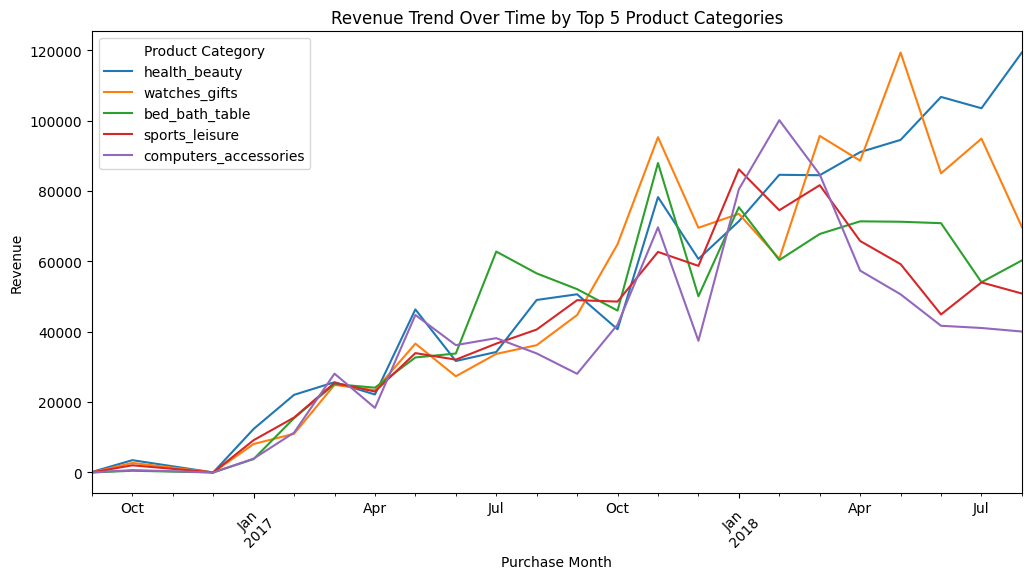

In [147]:
# Visualisasi tren pendapatan dari waktu ke waktu
top_categories = revenue_per_category.head(5).index  # Kategori teratas
revenue_trend[top_categories].plot(figsize=(12, 6))
plt.title('Revenue Trend Over Time by Top 5 Product Categories')
plt.ylabel('Revenue')
plt.xlabel('Purchase Month')
plt.xticks(rotation=45)
plt.legend(title='Product Category')

plt.show()

##### 🌟 Conclution 1.2

- Secara keseluruhan, kelima kategori produk teratas menunjukkan pertumbuhan yang baik, dengan lonjakan paling signifikan terjadi pada akhir tahun 2017.
- Health & Beauty tetap stabil dan dominan, sementara sports_leisure dan watches_gifts mengalami lonjakan besar selama musim liburan.
- Computers & Accessories menunjukkan potensi pertumbuhan jangka panjang, sedangkan bed_bath_table membutuhkan perhatian lebih untuk menghentikan penurunan konsistennya.

### Pertanyaan 2 : Berapa waktu rata-rata pengiriman untuk setiap kategori produk, dan bagaimana ini memengaruhi ulasan pelanggan?

Visualisasi waktu pengiriman rata-rata per kategori produk

Untuk menunjukkan waktu pengiriman rata-rata per kategori produk, grafik horizontal bar chart sangat sesuai. Kategori produk dengan waktu pengiriman tercepat dan terlama bisa dengan mudah dilihat.

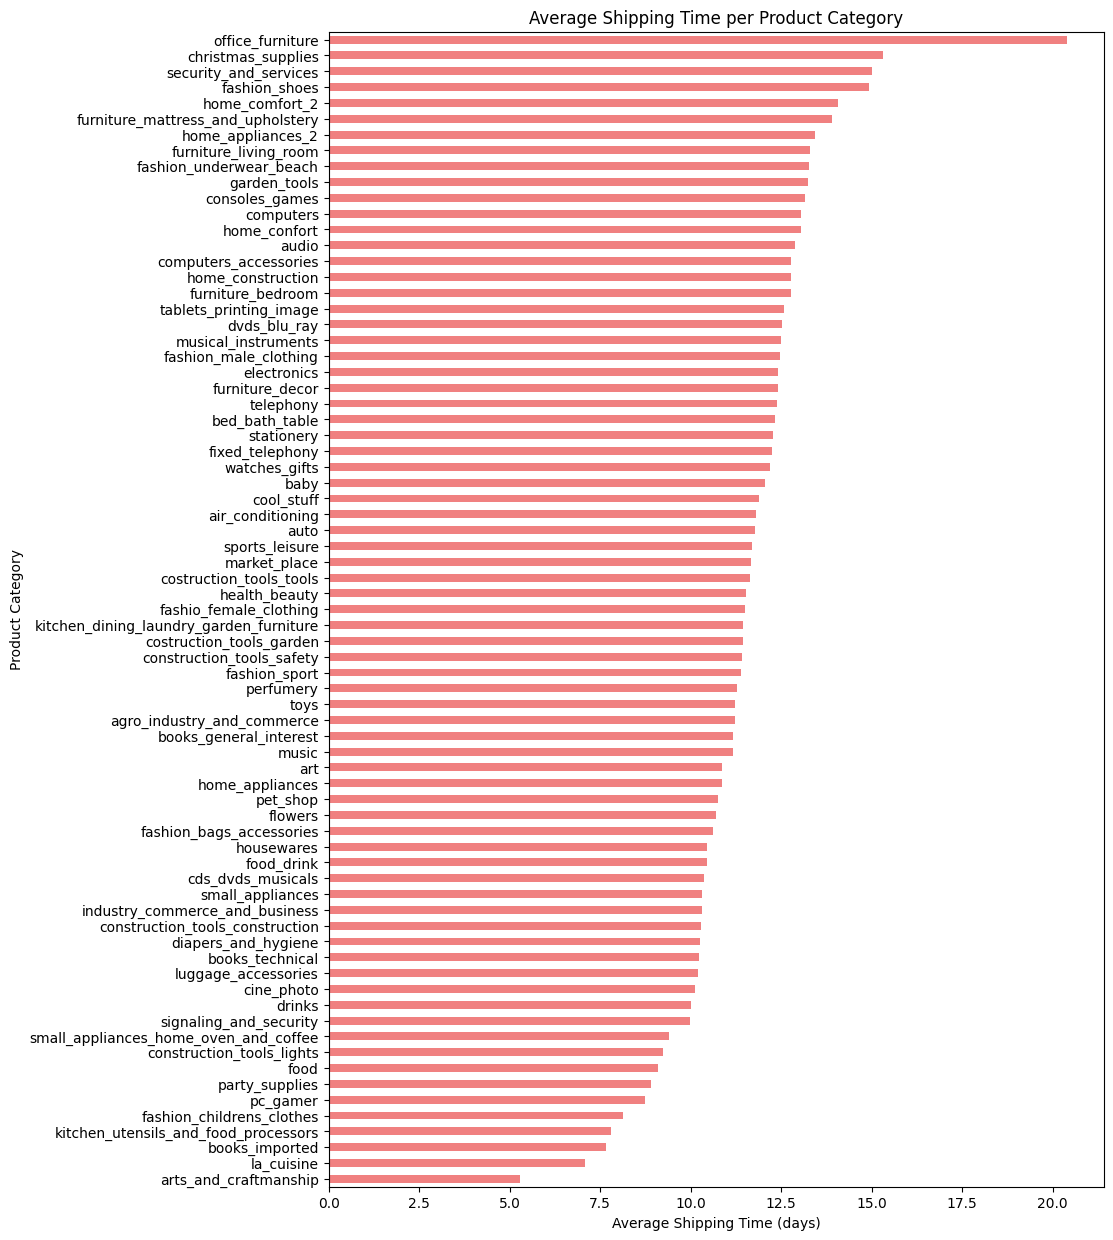

In [148]:
# Visualisasi waktu pengiriman rata-rata per kategori produk
plt.figure(figsize=(10, 15))
avg_shipping_time_per_category.plot(kind='barh', color='lightcoral')
plt.title('Average Shipping Time per Product Category')
plt.xlabel('Average Shipping Time (days)')
plt.ylabel('Product Category') 
plt.show()

##### 🌟 Conclution 2.1

- Produk dengan ukuran besar atau pengaturan logistik yang lebih kompleks seperti furniture dan office supplies cenderung memiliki waktu pengiriman yang lebih lama, dan ini mungkin bisa dioptimalkan lebih lanjut.
- Sebaliknya, produk yang lebih ringan dan lebih kecil seperti arts & craftmanship dan books cenderung dikirimkan lebih cepat, dan ini bisa menjadi keunggulan kompetitif untuk menarik pelanggan yang mengutamakan pengiriman cepat.
- Pengoptimalan logistik dan stok produk diperlukan untuk kategori dengan waktu pengiriman yang lebih lama, terutama pada produk furnitur dan elektronik, untuk meningkatkan pengalaman pelanggan dan memastikan kepuasan jangka panjang.

Visualisasi hubungan antara waktu pengiriman dan ulasan pelanggan

Untuk melihat apakah waktu pengiriman memengaruhi ulasan pelanggan, bisa menggunakan scatter plot atau line plot yang menampilkan hubungan antara shipping_time dan review_score.

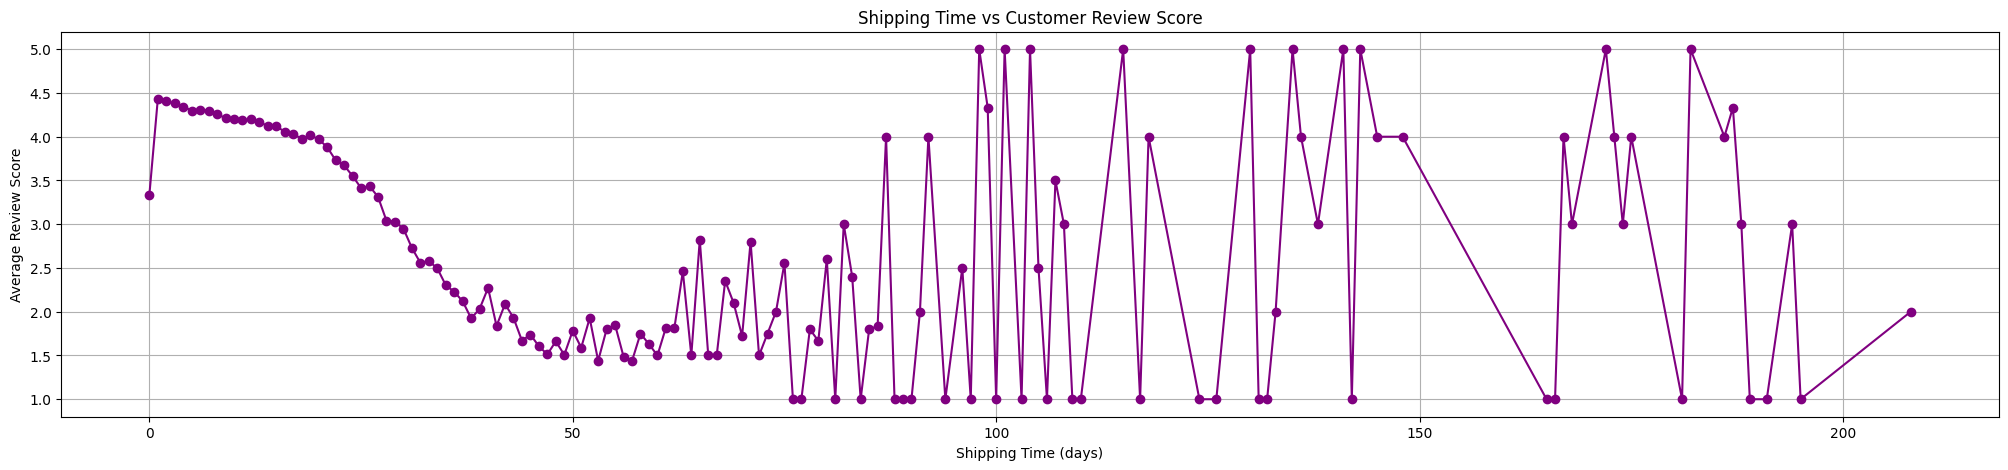

In [149]:
# Visualisasi hubungan waktu pengiriman dengan ulasan pelanggan
plt.figure(figsize=(25, 5))
plt.plot(shipping_review_relation.index, shipping_review_relation.values, marker='o', color='purple')
plt.title('Shipping Time vs Customer Review Score')
plt.xlabel('Shipping Time (days)')
plt.ylabel('Average Review Score')
plt.grid(True)
plt.show()

##### 🌟 Conclution 2.2

- Skor ulasan mulai menunjukkan penurunan yang jelas setelah 5-7 hari pengiriman, meskipun ulasan masih berada di atas 4,0 hingga sekitar 15 hari.
- Setelah 15 hari, kepuasan pelanggan mulai menurun lebih tajam, dengan skor rata-rata turun di bawah 4,0, menunjukkan potensi ketidakpuasan pelanggan terhadap pengiriman yang lambat.
- Waktu pengiriman sekitar 7 hari tampaknya merupakan titik di mana ulasan mulai menunjukkan tren penurunan yang lebih konsisten. 
- Setelah waktu pengiriman mencapai lebih dari 15 hari, skor ulasan rata-rata turun lebih cepat, yang mengindikasikan bahwa pengiriman yang sangat lambat (>15 hari) secara signifikan memengaruhi pengalaman pelanggan.

### Pertanyaan 3 : Produk mana yang memiliki tingkat pengembalian atau refund tertinggi, dan apa yang menjadi faktor penyebabnya?

Visualisasi tingkat pengembalian per kategori produk

Untuk menunjukkan kategori produk yang memiliki tingkat pengembalian tertinggi, bisa gunakan bar chart. Ini akan membantu mengidentifikasi kategori mana yang sering dibatalkan atau dikembalikan.

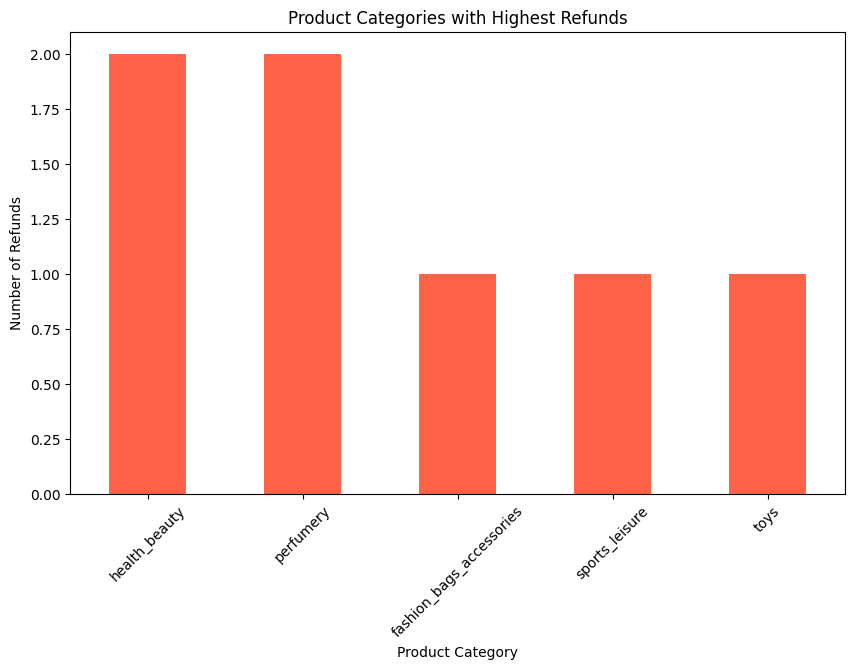

In [150]:
# Visualisasi tingkat pengembalian per kategori produk
plt.figure(figsize=(10, 6))
refund_per_category.plot(kind='bar', color='tomato')
plt.title('Product Categories with Highest Refunds')
plt.xlabel('Product Category')
plt.ylabel('Number of Refunds')
plt.xticks(rotation=45)
plt.show()

##### 🌟 Conlclution 3.1

- Kategori Health & Beauty dan Perfumery mencatat jumlah pengembalian tertinggi, yang mungkin mengindikasikan masalah terkait kualitas atau ekspektasi pelanggan yang tidak terpenuhi. 
- Sementara itu, kategori seperti fashion_bags_accessories dan sports_leisure juga perlu diawasi untuk mengurangi tingkat pengembalian. 

Visualisasi distribusi ulasan produk yang dikembalikan

Untuk melihat apakah ulasan buruk terkait dengan produk yang dikembalikan, bisa menggunakan bar chart untuk menampilkan distribusi skor ulasan dari produk yang dikembalikan.

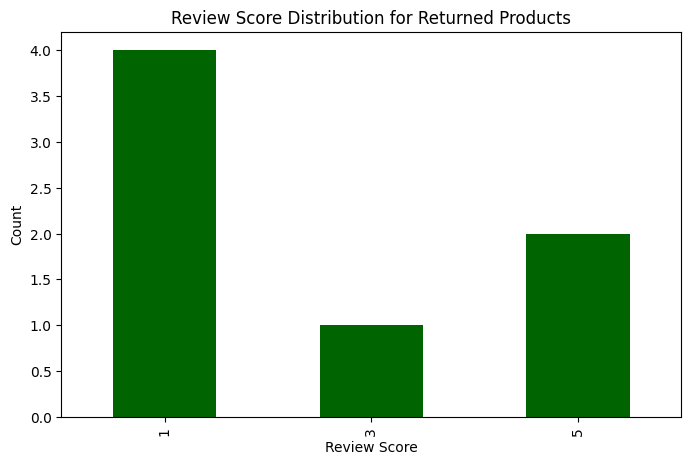

In [151]:
# Visualisasi distribusi skor ulasan dari produk yang dikembalikan
plt.figure(figsize=(8, 5))
refund_review_distribution.plot(kind='bar', color='darkgreen')
plt.title('Review Score Distribution for Returned Products')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

##### 🌟 Conclution 3.2

- Sebagian besar produk yang dikembalikan memiliki ulasan buruk (skor 1), menunjukkan adanya masalah kualitas atau ekspektasi yang tidak terpenuhi
- Namun, ada juga produk yang dikembalikan meskipun mendapat ulasan yang sangat baik (skor 5), yang mengindikasikan bahwa pengembalian tidak selalu terkait dengan kualitas produk itu sendiri. 